# Introduction to Computer Programming

## Week 9.2: Curve Fitting 

* * *

<img src="img/full-colour-logo-UoB.png" alt="Bristol" style="width: 300px;"/>

It can be useful to define a relationship between two variables, x and y. 

We often want to 'fit' a function to a set of data points (e.g. experimental data).

Python has several tools (e.g. Numpy and Scipy packages) for finding relationships in a set of data.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='LinearRegression'></a>
# Fitting a linear function
>*__Linear function:__ <br>Has form* $$f(x) = mx + c$$ <br> *where $m$ and $c$ are constants*.

Linear regression calculates a __linear function__ that minimizes the combined error between the fitted line and the data points. 

<img src="img/linear_regression.png" alt="Drawing" style="width: 300px;" align="center"/>

<a id='FittingPolynomialFunction'></a>
# Fitting a polynomial function

>*__Polynomial function:__ a function involving only non-negative integer powers of x.*

__1st degree polynomial__ &nbsp; &nbsp; $y = \mathrm{a}x^1 + \mathrm{b}x^0$
<br>(linear function)

__2nd degree polynomial__ &nbsp; &nbsp; $y = \mathrm{c}x^2 + \mathrm{d}x^1 + \mathrm{e}x^0$

__3rd degree polynomial__ &nbsp; &nbsp; $y = \mathrm{f}x^3 + \mathrm{g}x^2 + \mathrm{h}x^1 + \mathrm{i}x^0$


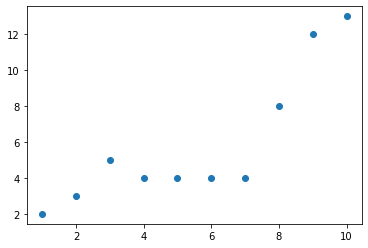

In [32]:
x = np.array([1, 6, 3, 4, 10, 2, 7, 8, 9, 5])
y = np.array([2, 4, 5, 4, 13, 3, 4, 8, 12, 4])

plt.plot(x,y,'o')
plt.show()

## Fitted function 
A polynomial function can be fitted using the `numpy.polyfit` function. 

Inputs: 
- independent variable 
- dependent variable
- degree of the polynomial 

Returns:
- coefficients of each term of the polynomial.

__Example 1:__ 

Fit a first degree polynomial (linear function) to the `x,y` data. 

Print the coefficients of the fitted function. 

In [34]:
x = np.array([1, 6, 3, 4, 10, 2, 7, 8, 9, 5])
y = np.array([2, 4, 5, 4, 13, 3, 4, 8, 12, 4])

c1 = np.polyfit(x, y, 1)

print(c1)

print(c1[0], c1[1])

[ 1.07272727e+00 -5.61733355e-15]
1.0727272727272728 -5.61733354972272e-15


We can now plot the fitted linear function

$y = \mathrm{a}x^1 + \mathrm{b}x^0$


In [35]:
a, b = c1[0], c1[1]    # coefficients a and b

y_new = a*x + b        # fitted line 

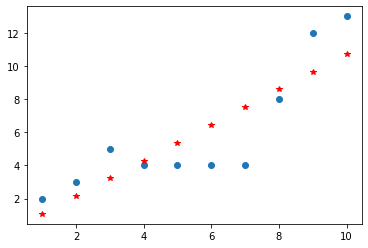

In [37]:
plt.plot(x,y,'o')
plt.plot(x,y_new,'r*')
plt.show()

##### Try it yourself 

__Example 2:__ 

Fit a second degree polynomial to the `x,y` data. 
<br>(Remember to import numpy to use `polyfit`).

Print the coefficients of the fitted function. 

In [39]:
x = np.array([1, 6, 3, 4, 10, 2, 7, 8, 9, 5])
y = np.array([2, 4, 5, 4, 13, 3, 4, 8, 12, 4])

c2 = np.polyfit(x, y, 2)

print(c2[0], c2[1], c2[2])

0.19318181818181812 -1.0522727272727261 4.249999999999994


# Fitted data

As the degree increases, the code to generate the fitted line gets longer.

In [15]:
yfit1 = c1[0]*x + c1[1]

yfit2 = c2[0]*x**2 + c2[1]*x + c2[2]

## Fitted data 
`numpy.polyval` : generates fitted y values.

Inputs:
- coefficients of the fitted polynomial function
- x data (monotonically sorted if plotting a line graph) 
 
Returns:
- fitted y data

__Example 3:__ 

Use `numpy.polyval` to generate x,y data of the fitted linear function.  

In [40]:
x_new = np.array(sorted(x))

yfit1 = np.polyval(c1, x_new)

##### Try it yourself 

__Example 4:__ 

Use `numpy.polval` to generate x,y data of the fitted second degree polynomial function.  

In [41]:
x_new = np.array(sorted(x))

yfit2 = np.polyval(c2, x_new)



## Plotting fitted data

__Example 5:__ Plot the raw data as a scatter plot and fitted linear function as a line graph  ont eh same figure. 

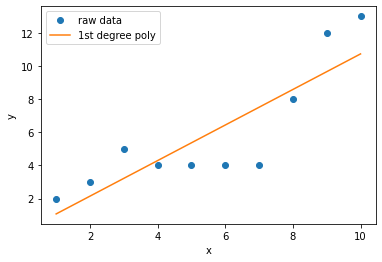

In [42]:
# plot data 
plt.plot(x, y, 'o', label='raw data')

plt.plot(x_new, yfit1, label='1st degree poly')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

##### Try it yourself 


__Example 6:__ Plot the raw data as a scatter plot and second degree polynomial function as a line graph  on the same figure. 

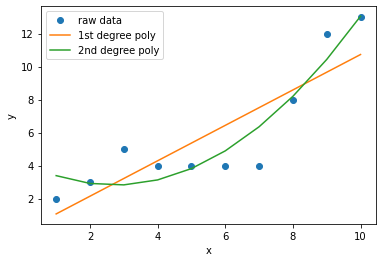

In [44]:
# plot data 
plt.plot(x, y, 'o', label='raw data')

plt.plot(x_new, yfit1, label='1st degree poly')

plt.plot(x_new, yfit2, label='2nd degree poly')

plt.legend()

plt.xlabel('x')
plt.ylabel('y')

plt.show()

<a id='FittingArbitraryFunction'></a>
# Fitting an Arbitrary Function

Curve fitting is not limited to polynomial functions. 

We can fit any function with unknown constants to the data using the function `curve_fit` from the `scipy` package.



### Fitted function 
Choose a function to fit e.g.
$$y = a e^{bx}$$

Define the function in the following format: 

In [45]:
def exponential(x, a, b): # input arguments are independent variable, then unknown constant(s) 
    y = a * np.exp(b*x)   
    return y              

### Fitted function

Use `scipy.optimize.curve_fit` to find the constants that best fit the function to the data.
<br>Inputs:
 - the function to fit 
 - the independent variable
 - the dependent variable
 

<br>Returns:
 - constants of fitted function
 - the covariance of the parameters (measure of the tendancy of one parameter to vary linearly with the other)

In [48]:
from scipy.optimize import curve_fit

# constants, covariance of fitted function
c, cov = curve_fit(exponential, x, y) 

### Fitted data 
Generate fitted data by runnig the function we defined (`exponential`), on:
- x data (sorted monotonically if plotting)
- fitted constants (`*` allows `c` to be a *data structure* of any length)
- remember `c` is the variable we created to store the output of `curve_fit`

In [49]:
# input  to function to get fitted data
# use monotonically sorted x data
x_new = np.array(sorted(x))

yfit = exponential(x_new, *c) 


### Plotting fitted data

y=1.4exp(0.22x)


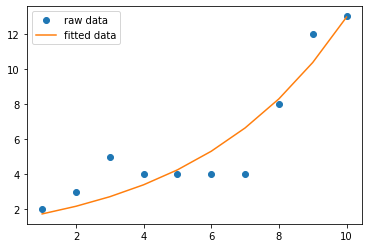

In [50]:
# plot data 
plt.plot(x, y, 'o',   label='raw data')      # raw data
plt.plot(x_new, yfit, label='fitted data');  # fitted function
plt.legend()

# equation of the fitted line
print(f'y={round(c[0],2)}exp({round(c[1],2)}x)')


How does `polyfit`/`curve_fit` determine which coefficients/constants give the best fit?

How can we measure 'goodness' of fit e.g. when choosing degree of polynomial for best fit line? 

<a id='RootMeanSquareError'></a>
# Root Mean Square Error (RMSE)
(*least squares*  approach)

<br>

A widely used measure of the error between fitted values and raw data. 

__Error/residual, $\varepsilon$:__ <br>The difference between the raw value $y(x)$ and the fitted value $a(x)$. 

$$
\varepsilon = a(x) - y(x)
$$

*Sum* of the squared errors for $N$ data points: 
<br>(error squared so that negative and positive errors do not cancel)

$$S = \sum_{i=1}^{N}\varepsilon_i^2$$



RMSE:
$$RMSE=\sqrt{\frac{1}{N}S}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}{\varepsilon_i^2}}$$



Smaller RMSE indictes smaller error (i.e. a better fit between raw and fitted data). 

We can optimise the fitted function by minimising the RMSE (used by `curve_fit`).

RMSE tells us statistically which line gives the best fit.

 



In [51]:
def RMSE(x, y, yfit):
    "Returns the RMSE of a y data fitted to x-y raw data"
    # error
    e = (yfit - y)  
    
    # RMSE
    return np.sqrt(np.sum(e**2)/ len(x)) 


Let's compare the RMSE of each polynomial we fitted to the x,y data earlier 

In [52]:
for degree in range(1, 3):
    
    c = np.polyfit(x, y, degree)        # coefficients of fitted polynomial
    
    yfit = np.polyval(c,x)              # no need to sort x monotonically, (not plotting line) use raw x data
    
    rmse = RMSE(x, y, yfit)             # goodness of fit
    
    print(f'polynomial order {degree}, RMSE = {rmse}')            

polynomial order 1, RMSE = 1.8964080880347554
polynomial order 2, RMSE = 1.2751114033327013


The second order polynomial gives a better fit.

__Example 7__

Fit the function $y = a e^{bx}$ which we defined earlier as `exponential` and find the RMSE:

In [53]:
c, cov = curve_fit(exponential, x, y)

yfit = exponential(x, *c)

rmse = RMSE(x, y, yfit)

print(f'RMSE = {rmse}')


RMSE = 1.3338248760975626


Of the three functions tested, the second order polynomial gives a better fit, statitically.

# Summary
<a id='Summary'></a>
1. Find constants of fitted function
    - __Polynomial functions:__ Find coefficients of polynomial by running `polyfit` on data and specifying degree of polynomial.
    - __Arbitrary functions:__ Find constants of arbitrary function by defining function to fit and running `curve_fit` on raw data and function to fit.  <br> <br>

1. Generate fitted data (arrange x data monotonically if plotting as graph):
    - __Polynomial functions:__ Use `polyval` to generate the fitted data using fitted coefficients for given input range.
    - __Arbitrary functions:__ Call function defined in step 1 using a range of x data and fitted coefficents as inputs. <br> <br>
    
1. Test goodness of fit: RMSE or other optimisation method. 


 